# Demo
## Data Visualization Exploratory Data Analysis

In [48]:
%matplotlib inline

In [187]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [50]:
coffee_data = pd.read_csv('data/merged_data_cleaned.csv', index_col = 0)

In [51]:
coffee_data.shape

(1339, 43)

In [52]:
coffee_data.dtypes

Species                   object
Owner                     object
Country.of.Origin         object
Farm.Name                 object
Lot.Number                object
Mill                      object
ICO.Number                object
Company                   object
Altitude                  object
Region                    object
Producer                  object
Number.of.Bags             int64
Bag.Weight                object
In.Country.Partner        object
Harvest.Year              object
Grading.Date              object
Owner.1                   object
Variety                   object
Processing.Method         object
Aroma                    float64
Flavor                   float64
Aftertaste               float64
Acidity                  float64
Body                     float64
Balance                  float64
Uniformity               float64
Clean.Cup                float64
Sweetness                float64
Cupper.Points            float64
Total.Cup.Points         float64
Moisture  

In [53]:
coffee_data['Harvest.Year'].astype(int, errors='ignore')

0       2014
1       2014
2        NaN
3       2014
4       2014
        ... 
1334    2016
1335    2016
1336    2014
1337    2013
1338    2013
Name: Harvest.Year, Length: 1339, dtype: object

In [54]:
coffee_data['Harvest.Year'].str.isnumeric().value_counts(dropna=False)

Harvest.Year
True     1128
False     164
NaN        47
Name: count, dtype: int64

In [55]:
coffee_data['Harvest.Year'].str.isnumeric().dropna() == True

0       True
1       True
3       True
4       True
5       True
        ... 
1334    True
1335    True
1336    True
1337    True
1338    True
Name: Harvest.Year, Length: 1292, dtype: bool

In [56]:
coffee_data_valid_years = coffee_data[coffee_data['Harvest.Year'].str.isnumeric() == True]

In [64]:
coffee_data_valid_years['Harvest.Year'] = coffee_data_valid_years['Harvest.Year'].astype(int)

C:\Users\Nikolay\AppData\Local\Temp\ipykernel_18120\4234690294.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffee_data_valid_years['Harvest.Year'] = coffee_data_valid_years['Harvest.Year'].astype(int)


In [65]:
years = coffee_data_valid_years['Harvest.Year'].value_counts().sort_index() # == coffee_data_valid_years.groupby(['Harvest.Year']).count()

In [66]:
years

Harvest.Year
2010     10
2011     26
2012    354
2013    181
2014    233
2015    129
2016    124
2017     70
2018      1
Name: count, dtype: int64

In [67]:
coffee_data_valid_years.groupby('Harvest.Year').size().sort_values(ascending=False)

Harvest.Year
2012    354
2014    233
2013    181
2015    129
2016    124
2017     70
2011     26
2010     10
2018      1
dtype: int64

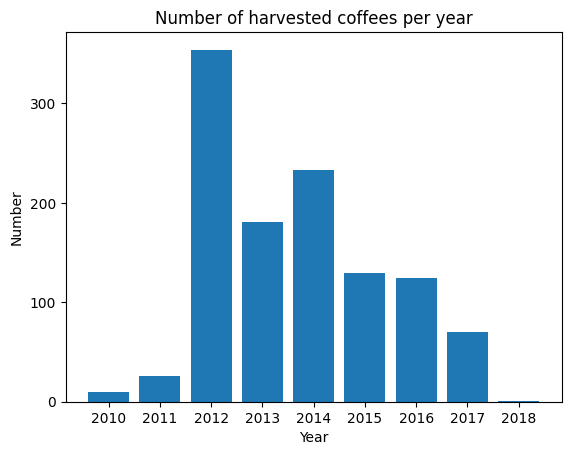

In [71]:
plt.bar(years.index, years)

plt.xticks(range(2010, 2019))
plt.yticks(range(0, 350, 100))

plt.xlabel('Year')
plt.ylabel('Number')

plt.title('Number of harvested coffees per year')

plt.show()

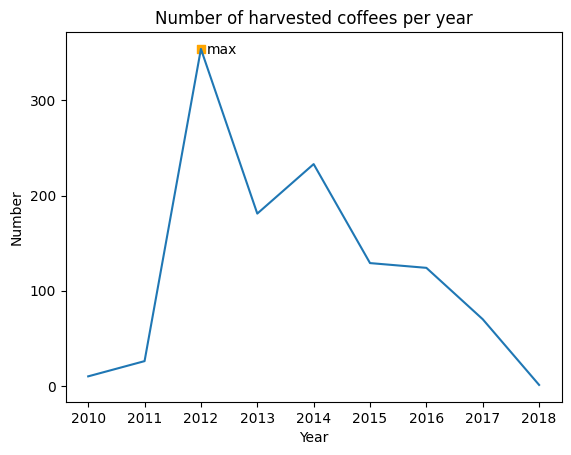

In [93]:
plt.plot(years.index, years)

plt.scatter(years.idxmax(), years.max(), marker='s', color='orange')
plt.annotate("max", (years.idxmax() + 0.1, years.max() -5 ))

plt.xticks(range(2010, 2019))
plt.yticks(range(0, 350, 100))

plt.xlabel('Year')
plt.ylabel('Number')

plt.title('Number of harvested coffees per year')

plt.show()

In [77]:
years.max(), years.idxmax()

(354, 2012)

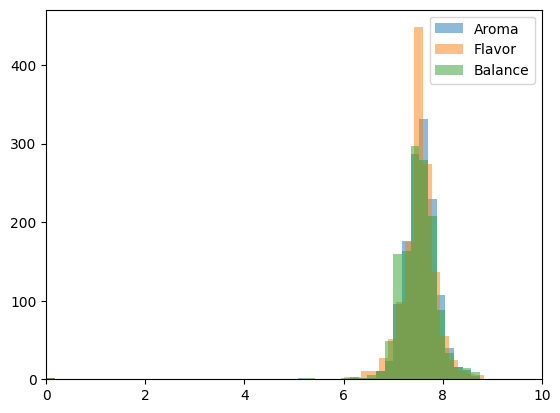

In [104]:
plt.hist(coffee_data.Aroma, bins=50, label='Aroma', alpha=0.5)
plt.hist(coffee_data.Flavor, bins=50, label='Flavor', alpha=0.5)
plt.hist(coffee_data.Balance, bins=50, label='Balance', alpha=0.5)

plt.xlim(0,10)
plt.legend()
plt.show()

In [108]:
coffee_data.loc[coffee_data.Balance < 6, ['Owner', 'Company', 'Species', 'Balance', 'Aroma', 'Flavor']]

,Owner,Company,Species,Balance,Aroma,Flavor
1310,bismarck castro,cigrah s.a de c.v,Arabica,0.00,0.0,0.00
1335,luis robles,robustasa,Robusta,5.25,7.5,7.67


In [109]:
coffee_data[coffee_data.Balance > 0].Balance.min()

5.25

In [112]:
coffee_data[coffee_data.Balance > 0].nsmallest(5, 'Balance')[['Owner', 'Company', 'Species', 'Balance', 'Aroma', 'Flavor']] # nsmallest - get from smallest to largest descript number on describe feature

,Owner,Company,Species,Balance,Aroma,Flavor
1335,luis robles,robustasa,Robusta,5.25,7.50,7.67
1308,"exportadora atlantic, s.a.",exportadora atlantic s.a,Arabica,6.08,7.25,6.58
1303,cadexsa,cadexsa,Arabica,6.17,6.67,6.50
1304,cadexsa,cadexsa,Arabica,6.17,7.00,6.17
1305,cadexsa,cadexsa,Arabica,6.17,7.00,6.33


In [113]:
coffee_data.Owner.value_counts()

Owner
juan luis alvarado romero           155
racafe & cia s.c.a                   60
exportadora de cafe condor s.a       54
kona pacific farmers cooperative     52
ipanema coffees                      50
                                   ... 
alvaro quiros perez                   1
olivia hernandez virves               1
finca las nieves                      1
pedro santos e silva                  1
james moore                           1
Name: count, Length: 315, dtype: int64

In [115]:
owners_with_only_one_coffee = coffee_data.Owner.value_counts() == 1

In [118]:
owners_with_only_one_coffee = owners_with_only_one_coffee[owners_with_only_one_coffee.values].index # posible without values

In [125]:
owners_with_only_one_coffee

Index(['gonzalo hernandez',
       'ibrahim hussien speciality coffee producer &export', 'case noyale ltd',
       'shwe yin mar coffee', 'francisco a mena', 'u htun htun',
       'hider abamecha', 'bob mccauley', 'delfina leon shine',
       'kongoni estate',
       ...
       'michael gavina', 'brian beck', 'gladness obed pallangyo',
       'dario cesar galeana sanchez', 'jose daniel cobilt castro',
       'alvaro quiros perez', 'olivia hernandez virves', 'finca las nieves',
       'pedro santos e silva', 'james moore'],
      dtype='object', name='Owner', length=172)

In [126]:
countries_single_owners = coffee_data[coffee_data.Owner.isin(owners_with_only_one_coffee)]['Country.of.Origin'].value_counts()

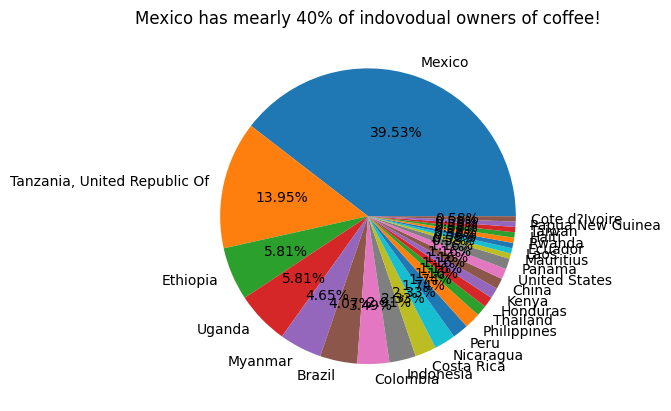

In [135]:
plt.pie(countries_single_owners, labels=countries_single_owners.index, autopct='%.2f%%')
plt.title('Mexico has mearly 40% of indovodual owners of coffee!')
plt.show()

In [124]:
coffee_data[~coffee_data.Owner.isin(owners_with_only_one_coffee)]['Country.of.Origin'].value_counts()

Country.of.Origin
Guatemala                       181
Colombia                        177
Mexico                          168
Brazil                          125
Taiwan                           74
United States (Hawaii)           73
Honduras                         51
Costa Rica                       47
Ethiopia                         34
Thailand                         30
Uganda                           26
Kenya                            23
Nicaragua                        22
El Salvador                      21
Tanzania, United Republic Of     16
Indonesia                        15
China                            14
India                            14
Malawi                           11
United States                     8
Vietnam                           8
Peru                              7
Haiti                             5
United States (Puerto Rico)       4
Philippines                       2
Panama                            2
Laos                              2
Burundi   

In [136]:
coffee_data.columns

Index(['Species', 'Owner', 'Country.of.Origin', 'Farm.Name', 'Lot.Number',
       'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region', 'Producer',
       'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner', 'Harvest.Year',
       'Grading.Date', 'Owner.1', 'Variety', 'Processing.Method', 'Aroma',
       'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity',
       'Clean.Cup', 'Sweetness', 'Cupper.Points', 'Total.Cup.Points',
       'Moisture', 'Category.One.Defects', 'Quakers', 'Color',
       'Category.Two.Defects', 'Expiration', 'Certification.Body',
       'Certification.Address', 'Certification.Contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

In [137]:
rating_columns = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness']

In [138]:
coffee_data[rating_columns].corr()

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness
Aroma,1.000000,0.813259,0.777056,0.723582,0.673006,0.708634,0.366578,0.335684,0.253493
Flavor,0.813259,1.000000,0.895672,0.816688,0.735720,0.792290,0.410923,0.396958,0.291065
Aftertaste,0.777056,0.895672,1.000000,0.792255,0.734306,0.809639,0.401456,0.386665,0.266409
Acidity,0.723582,0.816688,0.792255,1.000000,0.706435,0.733017,0.375383,0.300927,0.261854
Body,0.673006,0.735720,0.734306,0.706435,1.000000,0.757597,0.326879,0.276587,0.268342
Balance,0.708634,0.792290,0.809639,0.733017,0.757597,1.000000,0.400915,0.370341,0.283272
Uniformity,0.366578,0.410923,0.401456,0.375383,0.326879,0.400915,1.000000,0.526219,0.451083
Clean.Cup,0.335684,0.396958,0.386665,0.300927,0.276587,0.370341,0.526219,1.000000,0.440644
Sweetness,0.253493,0.291065,0.266409,0.261854,0.268342,0.283272,0.451083,0.440644,1.000000


<Axes: >

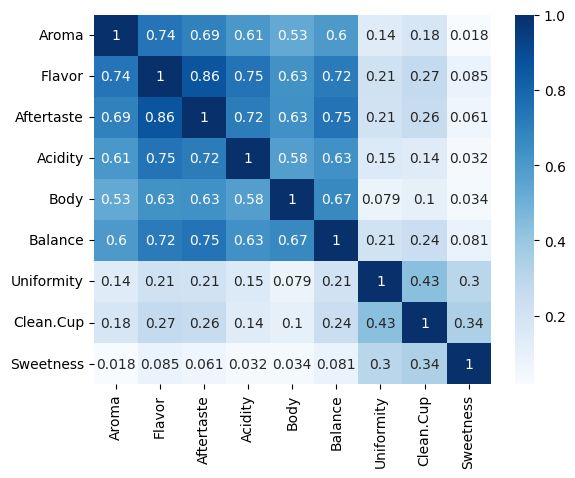

In [189]:
sns.heatmap(coffee_data[rating_columns].corr(), annot=True, cmap=plt.cm.Blues)

In [140]:
coffee_data[rating_columns].corr('spearman')

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness
Aroma,1.000000,0.715414,0.668453,0.614898,0.561393,0.615313,0.121619,0.169010,-0.014172
Flavor,0.715414,1.000000,0.809152,0.744695,0.670422,0.725580,0.168478,0.206467,0.010144
Aftertaste,0.668453,0.809152,1.000000,0.697735,0.678106,0.753583,0.167086,0.185766,-0.022423
Acidity,0.614898,0.744695,0.697735,1.000000,0.617025,0.661565,0.114920,0.118772,-0.023225
Body,0.561393,0.670422,0.678106,0.617025,1.000000,0.698753,0.044112,0.081132,-0.090430
Balance,0.615313,0.725580,0.753583,0.661565,0.698753,1.000000,0.134661,0.153227,-0.044265
Uniformity,0.121619,0.168478,0.167086,0.114920,0.044112,0.134661,1.000000,0.625821,0.404029
Clean.Cup,0.169010,0.206467,0.185766,0.118772,0.081132,0.153227,0.625821,1.000000,0.424389
Sweetness,-0.014172,0.010144,-0.022423,-0.023225,-0.090430,-0.044265,0.404029,0.424389,1.000000


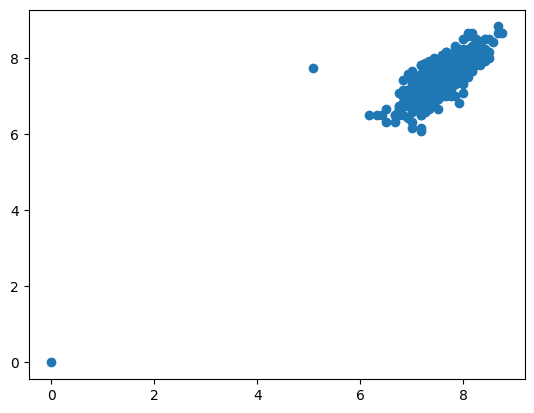

In [148]:
plt.scatter(coffee_data['Aroma'], coffee_data['Flavor'])

In [143]:
coffee_data[(coffee_data.Aroma == 0) | (coffee_data.Flavor == 0)]

,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
1310,Arabica,bismarck castro,Honduras,los hicaques,103,cigrah s.a de c.v.,13-111-053,cigrah s.a de c.v,1400,comayagua,...,Green,2,"April 28th, 2018",Instituto Hondureño del Café,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,m,1400.0,1400.0,1400.0


In [149]:
coffee_data = coffee_data[~(coffee_data.Aroma == 0) & ~(coffee_data.Flavor == 0)]

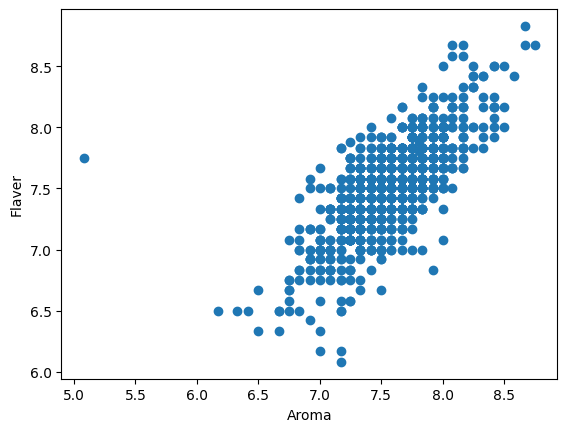

In [158]:
plt.scatter(coffee_data['Aroma'], coffee_data['Flavor'])

plt.xlabel('Aroma')
plt.ylabel('Flaver')

plt.show()

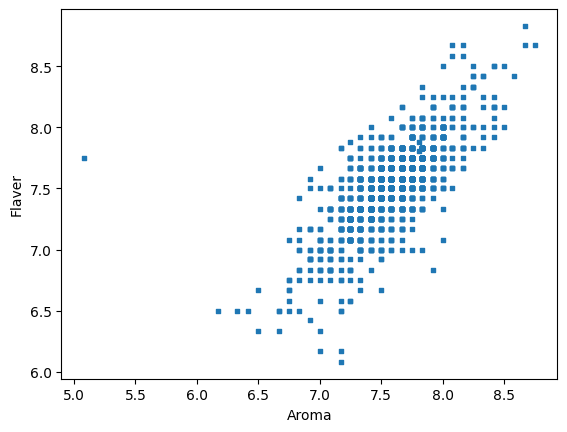

In [157]:
plt.scatter(coffee_data['Aroma'], coffee_data['Flavor'], s=10, marker='s')

plt.xlabel('Aroma')
plt.ylabel('Flaver')

plt.show()

In [160]:
coffee_data[['Aroma', 'Flavor']].corr('spearman')

,Aroma,Flavor
Aroma,1.00000,0.71477
Flavor,0.71477,1.00000


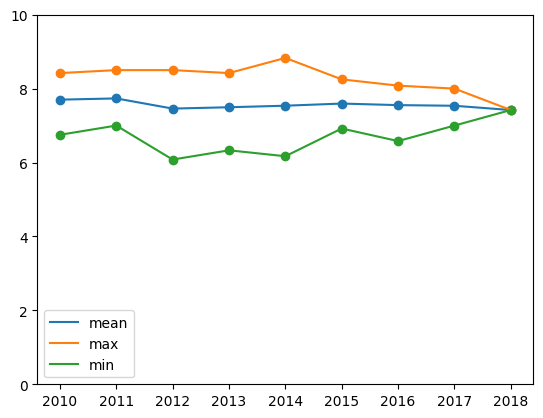

In [182]:
coffee_data_valid_years = coffee_data_valid_years[
    ~(coffee_data_valid_years.Aroma == 0) & 
    ~(coffee_data_valid_years.Flavor == 0)
]

mean_flovar_by_year = coffee_data_valid_years.groupby('Harvest.Year').Flavor.mean()
max_flovar_by_year = coffee_data_valid_years.groupby('Harvest.Year').Flavor.max()
min_flovar_by_year = coffee_data_valid_years.groupby('Harvest.Year').Flavor.min()

plt.scatter(
            mean_flovar_by_year.index, 
            mean_flovar_by_year
)
plt.plot(
            mean_flovar_by_year.index, 
            mean_flovar_by_year,
            label='mean'
)
plt.scatter(
            max_flovar_by_year.index, 
            max_flovar_by_year
)
plt.plot(
            max_flovar_by_year.index, 
            max_flovar_by_year,
            label='max'
)

plt.scatter(
            min_flovar_by_year.index, 
            min_flovar_by_year
)
plt.plot(
            min_flovar_by_year.index, 
            min_flovar_by_year,
            label='min'
)

plt.ylim(0, 10)
plt.legend()
plt.show()

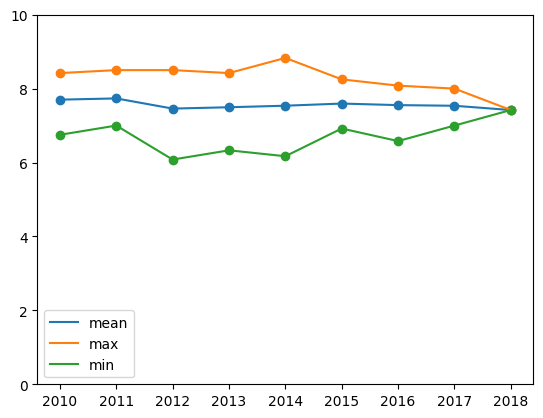

In [183]:
plt.scatter(
            mean_flovar_by_year.index, 
            mean_flovar_by_year
)
plt.plot(
            mean_flovar_by_year.index, 
            mean_flovar_by_year,
            label='mean'
)
plt.scatter(
            max_flovar_by_year.index, 
            max_flovar_by_year
)
plt.plot(
            max_flovar_by_year.index, 
            max_flovar_by_year,
            label='max'
)

plt.scatter(
            min_flovar_by_year.index, 
            min_flovar_by_year
)
plt.plot(
            min_flovar_by_year.index, 
            min_flovar_by_year,
            label='min'
)

plt.ylim(0, 10)
plt.legend()
plt.show()

In [186]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [ ]:
plt.style.use('seaborn-v0_8-bright') # method for change of style. For execute have to restart Notebook